<a href="https://colab.research.google.com/github/SzymonNowakowski/Machine-Learning-2024/blob/master/Lab02_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab2 - unsupervised learning: clustering
### Author: Szymon Nowakowski

## Intruduction

In this lab, we will explore clustering, a technique closely related to Principal Component Analysis. While PCA serves to identify directions in feature space (*columns* of the data matrix $X$), clustering identifies clusters of similarity in *rows* of $X$.

Clustering organizes data points based on shared characteristics, complementing PCA's emphasis on dimensionality reduction and feature extraction.

Clustering is a fundamental concept in **unsupervised learning**, a type of learning that deals with unstructured data without predefined labels. Clustering mirrors how children naturally learn to make sense of the world around them. When children are born, they lack pre-labeled categories for the objects they encounter. Instead, they observe and group similar things based on shared characteristics—like shapes, colors, or textures. For example, they might cluster soft, round objects as "balls" or distinguish people by recurring patterns such as faces and voices. This intuitive grouping process helps them organize the overwhelming complexity of their environment into meaningful categories, much like clustering algorithms organize unstructured data into clusters without prior labels.

# Evaluating Clustering Quality

## Intuitive Principles

Clustering is an unsupervised learning technique that organizes data points into groups based on their similarity or dissimilarity, without the need for predefined labels. While we often have an intuitive sense of what constitutes good clustering, it typically boils down to two key principles:

- Similar points should be grouped together in the same cluster (**compactness**). In other words, we expect the within cluster variance to be low.
- Distinct points should be placed in separate clusters (**separation**). We expect the between cluster variance to be high.

Beyond these basic notions, clustering as a machine learning method is surprisingly loosely defined!

## Evaluation Metrics

To assess the quality of clustering, we rely on metrics that capture the intrinsic properties of clusters, emphasizing both compactness and separation. These metrics translate our intuitive principles into measurable criteria for evaluating how well a clustering algorithm performs.

### 1. Silhouette Score

The silhouette score assesses the balance between cluster compactness and separation. For a single point $i$, the silhouette value is:

$$ s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))} $$

where:

- $a(i)$ is the average distance between $i$ and all other points in the same cluster. It measures *compactness* of $i$, i.e. how close the point is to others in its own cluster.
- $b(i)$ is the minimum average distance between $i$ and the points in the nearest neighboring cluster. It measures *separation* of $i$, i.e. how far the point is from points in the nearest cluster.

For each point, the silhouette value measures the difference between compactness and separation.

The silhouette value is then normalized and ranges between $-1$ and $1$:

- $s(i) \approx 1$: The point is **well-clustered**, meaning it is close to points in its own cluster and far from points in other clusters.
- $s(i) \approx 0$: The point is on or **near the boundary between clusters**.
- $s(i) \approx -1$: The point is likely **misclassified**, as it is closer to a different cluster than to the cluster it was assigned.

The overall silhouette score for the clustering is the mean silhouette value across all points:

$$ S = \frac{1}{n} \sum_{i=1}^n s(i) $$

Values close to $1$ indicate well-separated and compact clusters, while values near $0$ or negative suggest overlapping clusters.

### 2. Inertia, or Within-Cluster Sum of Squares (SS)
Inertia measures the compactness of clusters by summing the squared distances of points to their assigned cluster centroid: $ \text{Inertia} = \sum_{k=1}^K \sum_{i \in C_k} ||x_i - \mu_k||^2 $ where:

$K$ is the number of clusters.
$C_k$ is the set of points in cluster $k$.
$\mu_k$ is the centroid of cluster $k$.
$||x_i - \mu_k||^2$ is the squared Euclidean distance between point $x_i$ and the centroid $\mu_k$.

Lower inertia values indicate tighter, more compact clusters.

### Other metrics

There are other metrics. The difference is how the between cluster variance (separation) and within cluster variance (compactness) are estimated and on normalization schemes. The examples are:

1. Calinski-Harabasz Index
2. Davies-Bouldin Index
3. Dunn Index










# Gaussian mixture clustering (EM clustering)

# Vanilla* K-Means Algorithm

<small><small><small>[* In the context of algorithms or technology, the term **vanilla** refers to something in its basic, unmodified, or standard form, without any special additions, customizations, or enhancements. It is derived from the perception of vanilla as a "plain" or "default" flavor in food, particularly **ice cream**.]</small></small></small>

The K-Means algorithm is a method for clustering points in a Euclidean space $\mathbb{R}^d$. **The Euclidean space assumption is very strong but it is necessary for the algorithm.** The algorithm works as follows:

- **Random Initialization**: Randomly create $k$ centroids, which are points in the space $\mathbb{R}^d$.
- **Assignment Step**: Assign each data point to the nearest centroid based on the Euclidean distance.
- **Update Step**: Recompute each centroid's position as the mean of all points assigned to it.
- **Repeat**: Assignment and Update steps are repeated iteratively until convergence, typically when the centroids stabilize or the improvement in clustering quality becomes negligible.

## Key Properties of K-Means

The K-Means algorithm has the following properties:

- It **requires** Euclidean distance is used as the distance measure.
- It tends to divide the dataset into clusters of roughly equal size.
- Thanks for computing the centroids, it has relatively low computational complexity, making it efficient for large datasets.

## Inertia (Within Cluster SS) Local Minimization

At each update step, the algorithm locally reduces the Inertia measure, which evaluates the compactness of clusters. To understand this, observe that in Euclidean space, the Sum of Squares is minimized when the point is located at the centroid of the cluster.

The assignment step ensures that each point is assigned to its nearest centroid, while the update step recalculates centroids to minimize the sum of squared distances for points within each cluster. This iterative process leads to a local minimum of the Inertia measure.

In a variant of the K-Means algorithm, the process can be restarted multiple times with different initializations. Among the results, the one corresponding to the best local minimum (i.e. the one with the lowest Inertia value) is selected and reported.

## K-Medoids Algorithm

The K-Medoids algorithm is another noteworthy variant of K-Means. It drops the requirement for the data to be Euclidean (with the price of increased computationall complexity). Instead of using centroids, it selects medoids, which are actual observations from the dataset representing the cluster centers.

- **Random Initialization**: Randomly select $k$ observations as medoids.
- **Assignment Step**: Assign each data point to the nearest medoid.
- **Update Step**: Iteratively replace a medoid with another observation and check whether the total distance between points and their nearest medoids decreases.
- **Repeat**: Assignment and Update steps are repeated until no further improvement is possible.

### Key Properties of K-Medoids

The K-Medoids algorithm has the following properties:

- It allows the use of any distance metric, not just Euclidean distance.
- Finding the medoid for each cluster requires comparing distances between all points within the cluster. This process is computationally more complex than calculating the centroid, which is simply the mean of the points. As a result, the overall **computational complexity of K-Medoids is higher than that of vanilla K-Means**.

**The medoids are always actual observations from the dataset, unlike centroids in K-Means.**



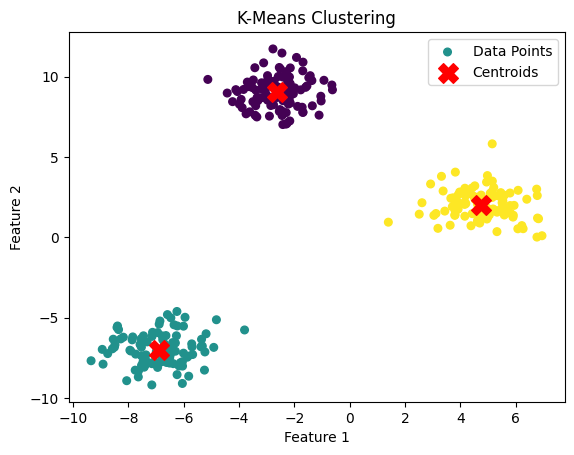

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data with 3 clusters
X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

# Create the KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the data points and cluster centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
